In [39]:
import keras

In [40]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [54]:
#preparing the data
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [45]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [46]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))



In [47]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 184us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010


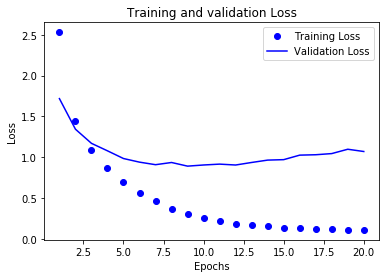

In [51]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


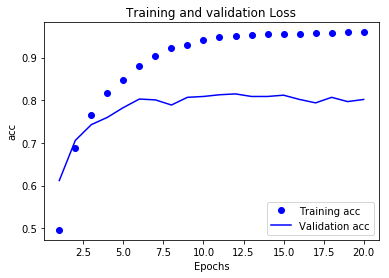

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [55]:

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 185us/step - loss: 2.6045 - acc: 0.5226 - val_loss: 1.6894 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 139us/step - loss: 1.3988 - acc: 0.7098 - val_loss: 1.2836 - val_acc: 0.7080
Epoch 3/8
7982/7982 [==============================] - 1s 135us/step - loss: 1.0375 - acc: 0.7821 - val_loss: 1.0864 - val_acc: 0.7660
Epoch 4/8
7982/7982 [==============================] - 1s 143us/step - loss: 0.8166 - acc: 0.8307 - val_loss: 0.9900 - val_acc: 0.7930
Epoch 5/8
7982/7982 [==============================] - 1s 150us/step - loss: 0.6526 - acc: 0.8648 - val_loss: 0.9270 - val_acc: 0.8060
Epoch 6/8
7982/7982 [==============================] - 1s 133us/step - loss: 0.5181 - acc: 0.8935 - val_loss: 0.9102 - val_acc: 0.8020
Epoch 7/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.4153 - acc: 0.9139 - val_loss: 0.8533 - val_acc: 0.8220
Epoch 8

In [56]:
results

[0.9743619994828453, 0.78717720397115287]

In [59]:
predictions = model.predict(x_test)

In [60]:
predictions[0].shape

(46,)

In [61]:
np.sum(predictions[0])


0.99999994

In [62]:
np.argmax(predictions[0])

3

In [63]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [66]:
model.compile(optimizer='rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['acc'])


In [68]:
#Bottleneck formed in the intemediate layer.
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 168us/step - loss: 3.5802 - acc: 0.2042 - val_loss: 3.3390 - val_acc: 0.2290
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 3.2068 - acc: 0.2254 - val_loss: 3.1170 - val_acc: 0.2300
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 3.0031 - acc: 0.2250 - val_loss: 2.9819 - val_acc: 0.2230
Epoch 4/20
7982/7982 [==============================] - 1s 136us/step - loss: 2.8427 - acc: 0.2228 - val_loss: 2.8485 - val_acc: 0.2390
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.6829 - acc: 0.2631 - val_loss: 2.7304 - val_acc: 0.2730
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 2.5184 - acc: 0.2980 - val_loss: 2.5871 - val_acc: 0.2840
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss: 2.3380 - acc: 0.3126 - val_loss: 2.4342 - val_acc: 0.2990
